In [1]:
# Import Libraries
import numpy as np

from project_utils.bb_model         import BB_Model
from project_utils.feature_stats    import Feature_Statistics
from project_utils.feature_stats    import Regression_Container
from project_utils.acq_data_capture import Acq_Data_nD
from project_utils.surroagte_gp     import Surrogate_GP



Num_Points = 10


In [2]:
# Load Forrester model

Reg_Data = BB_Model(dataset = 'Regression_2', Feature_Counts=[10,8])

#Reg_Data.df().head()

In [3]:
Reg_Data.MPL()

C:\Users\deneb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.5948649522916043


MLPRegressor(random_state=RandomState(MT19937) at 0x2055F809840)

In [4]:
Reg_Data.Random_Forest()

0.5453081223168325


RandomForestRegressor(random_state=RandomState(MT19937) at 0x2055F809840)

In [5]:
Reg_Data.GP()

-1.989783919992091


GaussianProcessRegressor()

In [6]:
print(Reg_Data.get_features())

['Passive_0', 'Passive_1', 'Active_2', 'Active_3', 'Active_4', 'Active_5', 'Active_6', 'Active_7']


In [7]:
#Default settings
from unravel_2.ur_model import UR_Model

X_train, X_test, y_train, y_test = Reg_Data.get_TT_data()

#Initializing the explainer object
URM_Exp = UR_Model(bbox_model           = Reg_Data.get_Random_Forest(),
                   train_data           = X_train,
                   feature_names        = Reg_Data.get_features(),
                   categorical_features = Reg_Data.get_catagorical(),
                   mode                 = Reg_Data.get_mode(),
                   sampling_optimize    = "opt")

#sur_GP = Surrogate_GP()


In [8]:
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
print('Mean 0:', mean)
print('Std 0: ', std)


Mean 0: [ 3.18465579  5.37418022  5.81328886  3.81693199  5.55308716  7.57412185
 11.45220007 11.56305762]
Std 0:  [3.89504959 2.98885104 3.40752648 3.55503118 0.76339094 2.42907255
 4.249504   4.85237741]


In [9]:
# Generate explantion data for Random Forest

Reg_Stats = Feature_Statistics(feature_names = Reg_Data.get_features(), mode = Reg_Data.get_mode())

if Num_Points == 0: Num_Points = X_test.shape[0]

for test_instance in range(Num_Points):

    print('INSTANCE: ', test_instance)
       
    data_row  = np.array([X_test[test_instance]])
    
#    data_row  = np.array([0.4])

#    print('data row ',data_row)
    
    URM_Exp.explain(X_init      = data_row.reshape(1, -1),
                    Dimension   = 'Multi D',
                    kernel_type = "Matern",
                    max_iter    = 20,
                    alpha       = "FUR_W",
                    #jitter=5,
                    interval    = 1,
                    normalize   = False)
       
    f_predict = Reg_Data.get_Random_Forest().predict(data_row.reshape(1, -1))

    e_predict = URM_Exp.exp_predict(data_row.reshape(1, -1))
    e_predict = np.array(e_predict).ravel()
    
    acq_data = URM_Exp.get_acq_data()
    
#    X, y = URM_Exp.get_surrogate_data()

#    e_predict = sur_GP.predict(X, y)
#    e_predict = sur_GP.predict(URM_Exp.get_surrogate_data())

    print(f_predict, e_predict, acq_data.get_fe_x0())
    
    scores = URM_Exp.permutation_importance()
    
    Reg_Stats.Add_Sample(sample_scores = scores,
                         outcome       = y_test[test_instance],
                         X_row         = data_row.reshape(1, -1),
                         f_prediction  = f_predict,
                         e_prediction  = e_predict.ravel(),
                         feopt         = acq_data.get_fe_x0(),
                         model         = URM_Exp.get_exp_model())


INSTANCE:  0


C:\Users\deneb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\_gpr.py:616: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\deneb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\_gpr.py:616: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\deneb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\_gpr.py:616: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations

[60.32278235] [6.03227825e+01 1.00000004e-05] [60.32278252]
Passive_0:	 727.00675
Passive_1:	 497.18647
Active_2:	 607.00519
Active_3:	 644.37042
Active_4:	 13.05047
Active_5:	 346.75258
Active_6:	 807.08115
Active_7:	 926.72007
INSTANCE:  1
[-10.04876873] [-1.00487687e+01  1.00000004e-05] [-10.04876873]
Passive_0:	 57.60807
Passive_1:	 51.36544
Active_2:	 54.71379
Active_3:	 55.60621
Active_4:	 5.16474
Active_5:	 45.58240
Active_6:	 59.43535
Active_7:	 61.88563
INSTANCE:  2
[37.51075061] [3.75107506e+01 1.00000004e-05] [37.51075062]
Passive_0:	 728.30516
Passive_1:	 552.03995
Active_2:	 640.92488
Active_3:	 675.11413
Active_4:	 30.04784
Active_5:	 417.34711
Active_6:	 786.26225
Active_7:	 855.48293
INSTANCE:  3


C:\Users\deneb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\_gpr.py:616: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


[149.22888637] [1.49228886e+02 1.00000004e-05] [149.22888639]
Passive_0:	 2867.59906
Passive_1:	 1804.55162
Active_2:	 2302.73361
Active_3:	 2476.59667
Active_4:	 39.16497
Active_5:	 1161.75932
Active_6:	 3253.68025
Active_7:	 3841.01361
INSTANCE:  4
[157.04662388] [1.57046624e+02 1.00000004e-05] [157.04662445]
Passive_0:	 2496.77477
Passive_1:	 1525.05505
Active_2:	 1973.65957
Active_3:	 2133.00944
Active_4:	 30.84748
Active_5:	 963.31050
Active_6:	 2863.44460
Active_7:	 3435.67473
INSTANCE:  5
[120.23791948] [1.20237920e+02 1.00000004e-05] [120.23791955]
Passive_0:	 6071.32817
Passive_1:	 4641.09552
Active_2:	 5351.57656
Active_3:	 5609.30524
Active_4:	 274.21922
Active_5:	 3540.87427
Active_6:	 6491.99554
Active_7:	 7087.40233
INSTANCE:  6


C:\Users\deneb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\_gpr.py:616: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


[191.98437279] [1.91984373e+02 1.00000004e-05] [191.9843728]
Passive_0:	 6514.87926
Passive_1:	 4147.10654
Active_2:	 5261.44122
Active_3:	 5648.36136
Active_4:	 94.33322
Active_5:	 2695.15270
Active_6:	 7365.33835
Active_7:	 8647.04121
INSTANCE:  7


C:\Users\deneb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\_gpr.py:616: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\deneb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\_gpr.py:616: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\deneb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\_gpr.py:616: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations

[116.08068536] [1.16080685e+02 9.99995045e-06] [116.08068513]
Passive_0:	 990.07156
Passive_1:	 581.23453
Active_2:	 767.42599
Active_3:	 834.67314
Active_4:	 10.47612
Active_5:	 355.90886
Active_6:	 1149.03694
Active_7:	 1400.91706
INSTANCE:  8
[88.97059045] [8.89705908e+01 1.00000004e-05] [88.9705908]
Passive_0:	 1179.57639
Passive_1:	 703.12521
Active_2:	 921.79082
Active_3:	 1000.05587
Active_4:	 12.57604
Active_5:	 434.26871
Active_6:	 1361.42774
Active_7:	 1646.42048
INSTANCE:  9
[46.52839772] [4.65283977e+01 1.00000004e-05] [46.52839772]
Passive_0:	 1637.36330
Passive_1:	 1330.92130
Active_2:	 1486.95318
Active_3:	 1535.75776
Active_4:	 112.30403
Active_5:	 1075.91579
Active_6:	 1728.69655
Active_7:	 1854.52527


In [10]:
import matplotlib.pyplot as plt


In [11]:
print(f_predict)
print(e_predict)


[46.52839772]
[4.65283977e+01 1.00000004e-05]


In [12]:
Reg_Stats.Feature_Counts(max_features=6, scaled=True, threshold=0.05)


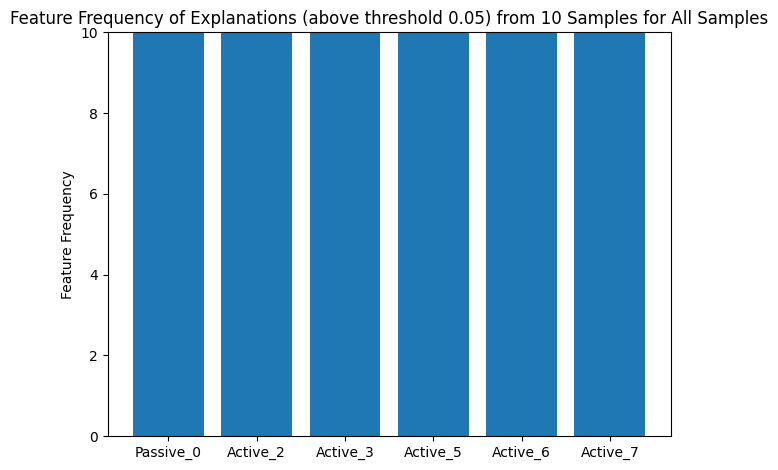

In [13]:
Reg_Stats.Frequency_Plot()


In [14]:
Reg_Stats.Fidelity()

Average, Var, and Max Differences:
y - BB(x):           33.844985757378105  :  471.72085227378045  :  69.1240955774569
y - exp(x):          33.84498573484508  :  471.7208515374952  :  69.12409558006414
BB(x) - exp(x):      1.3954975806029779e-07  :  3.2482578301814295e-14  :  5.719742262044747e-07
Average exp(x) var:  9.99999541768596e-06


In [15]:
Reg_Stats.Jaccard_Values()

Mean Jaccard Similarity:  1.0
Mean Jaccard Distance:    0.0


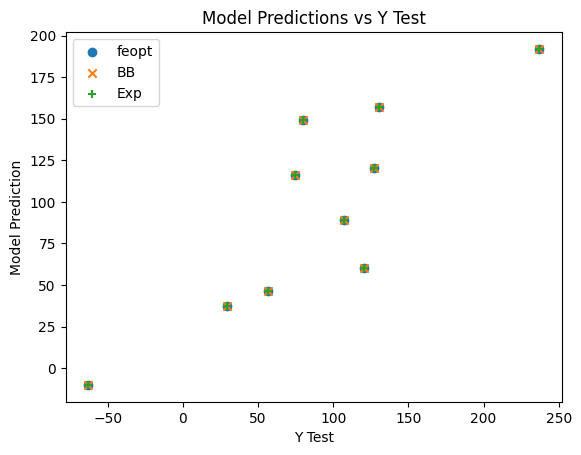

In [16]:
Reg_Stats.Reg_Fidelity_Graph()

top_features True
top_features (10, 6)


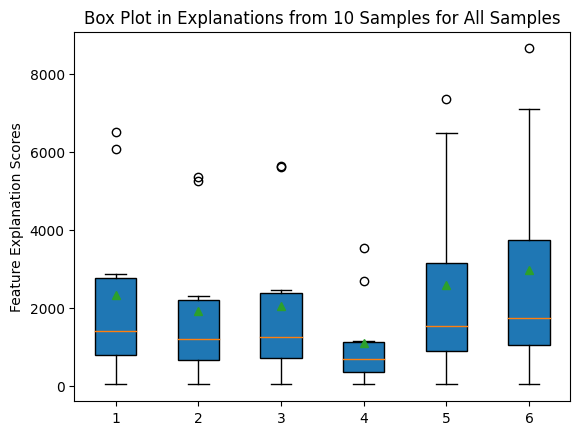

1 -      Passive_0
2 -      Active_2
3 -      Active_3
4 -      Active_5
5 -      Active_6
6 -      Active_7


In [17]:
Reg_Stats.Box_Plot()


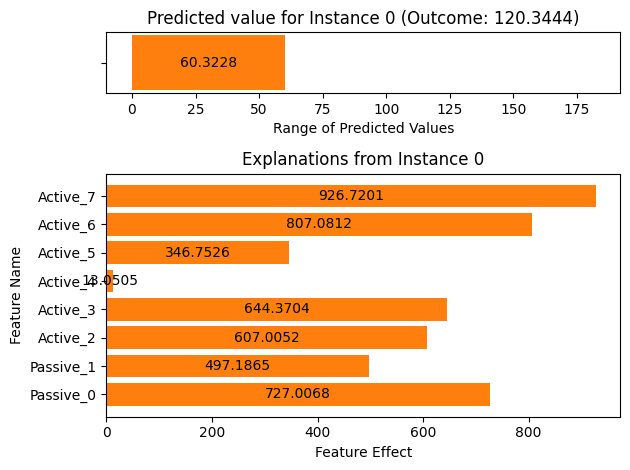

In [18]:
Reg_Stats.View_Explanation(instance = 0)

In [19]:
scores = URM_Exp.permutation_importance()
    


Passive_0:	 1780.12454
Passive_1:	 1464.38450
Active_2:	 1629.12201
Active_3:	 1679.05257
Active_4:	 115.72673
Active_5:	 1183.30161
Active_6:	 1867.33634
Active_7:	 1981.41836


In [20]:
scores_k = URM_Exp.KL_imp()

print(scores_k)

[11.3448973  11.64134614 11.51311636 11.46426355 12.04354083 11.78739474
 11.21156375 10.96994597]


In [21]:
scores_v = URM_Exp.Var_imp()

print(scores_v)

[177.92878306 170.62189427 173.68456568 174.88813775 161.71850775
 167.27947844 181.52491871 188.77723475]


In [22]:
scores_x = URM_Exp.X_rel()

print(scores_x)

[0.21288566 1.16608831 0.80342894 1.16389956 1.15526798 1.16597935
 1.16597008 1.16648011]


In [23]:
scores_x2 = URM_Exp.X2_rel()

print(scores_x2)

[2.84444444 0.07901235 3.3382716  0.01975309 0.49382716 0.96790123
 0.17777778 0.07901235]


In [25]:
print(URM_Exp.get_exp_L())


[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 5.30551531e-05  9.99999999e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 5.30551531e-05 -2.41163131e-09  9.99999999e-01  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.0

In [ ]:
acq_data.Create_BB_plot()

In [ ]:
acq_data.plot_point(0)

In [ ]:
acq_data.plot_point(5)

In [ ]:
acq_data.plot_point(10)

In [ ]:
acq_data.plot_point(15)

In [ ]:
acq_data.plot_point(19)

In [ ]:
acq_data.plot_all()